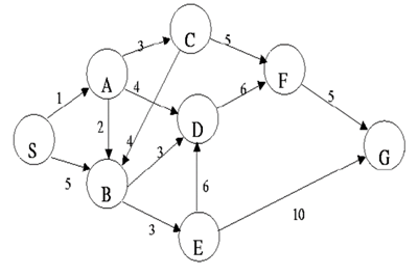

In the above graph, the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Call **UCS**, **GBF** and  **A star** for this graph. Also insert the drawing of simulations one by one.

In [37]:
example1 = {'S':{'A':1,'B':5},
            'A':{'B':2,'C':3,'D':4},
            'B':{'D':3,'E':3},
            'C':{'B':4,'F':5},
            'D':{'F':6},
            'E':{'D':6,'G':10},
            'F':{'G':5},
            'G':{}
            }

#Uniform Cost Search

In [40]:
from queue import PriorityQueue
def ucs(start, goal, G):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((0, [start]))

    print(f'{start}: 0')
    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # selceting the node
        ucost, upath = pq.get() # select a node for expansion
        u = upath[-1]

        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              for node in upath: print(node,end='-')
              print(f'{v}:{vcost}')

              pq.put((vcost,vpath))# store the generated node in the frontier

    print('Failed')

In [45]:
ucs('S', 'G', example1)

S: 0
S is selected. Expanded list: S
S-A:1
S-B:5
S-A is selected. Expanded list: S,A
S-A-B:3
S-A-C:4
S-A-D:5
S-A-B is selected. Expanded list: S,A,B
S-A-B-D:6
S-A-B-E:6
S-A-C is selected. Expanded list: S,A,B,C
S-A-C-F:9
S-A-D is selected. Expanded list: S,A,B,C,D
S-A-D-F:11
S-B is selected. S-A-B-D is selected. S-A-B-E is selected. Expanded list: S,A,B,C,D,E
S-A-B-E-G:16
S-A-C-F is selected. Expanded list: S,A,B,C,D,E,F
S-A-C-F-G:14
S-A-D-F is selected. S-A-C-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'A', 'C', 'F', 'G'], 14)

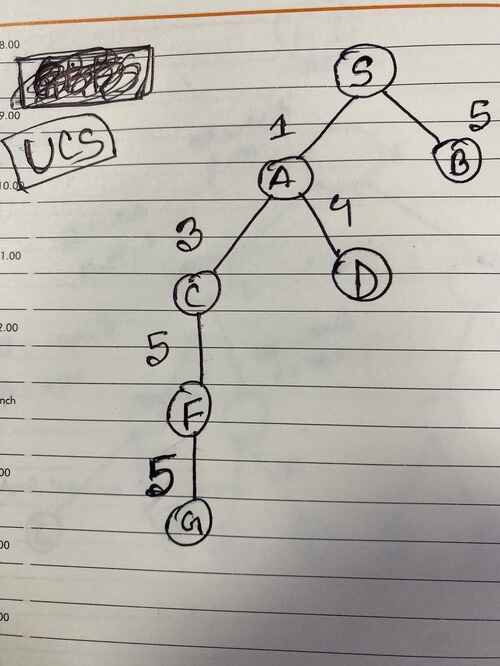

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# Greedy Best First Search

In [46]:
from queue import PriorityQueue
def gbfs(start, goal, G, her):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((her[start], [start], 0))

    print(f'{start}: 0')
    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # selceting the node
        _ , upath, ucost = pq.get() # select a node for expansion
        u = upath[-1]

        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              for node in upath: print(node,end='-')
              print(f'{v}:{vcost}')

              pq.put((her[v],vpath,vcost))# store the generated node in the frontier

    print('Failed')

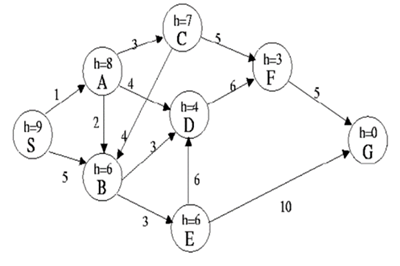

In [47]:
example1_h = {'S':9,'A':8,'B':6,'C':7,'D':4,'E':6,'F':3,'G':0}
gbfs('S', 'G', example1, example1_h)

S: 0
S is selected. Expanded list: S
S-A:1
S-B:5
S-B is selected. Expanded list: S,B
S-B-D:8
S-B-E:8
S-B-D is selected. Expanded list: S,B,D
S-B-D-F:14
S-B-D-F is selected. Expanded list: S,B,D,F
S-B-D-F-G:19
S-B-D-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'B', 'D', 'F', 'G'], 19)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (Double Click to edit this cell)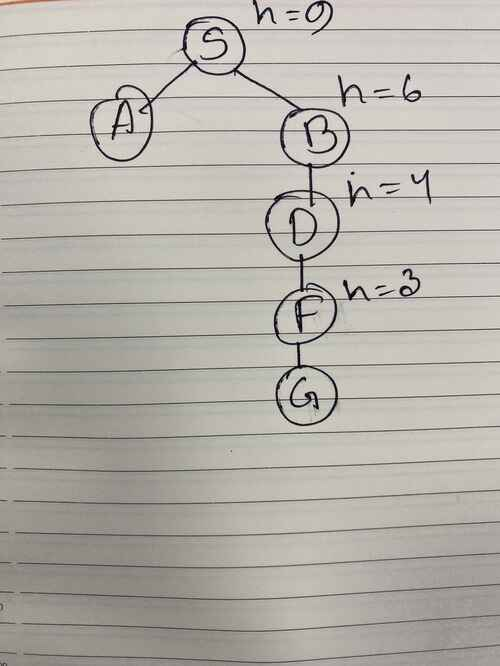

# A*

In [48]:
from queue import PriorityQueue

def astar(start, goal, G, her):
    # Expanded list is initially empty
    expanded = []

    # Priority queue: stores nodes with their f(n), path, and g(n)
    pq = PriorityQueue()
    pq.put((her[start], [start], 0))  # (f(n), path, g(n))

    print(f'{start}: 0')
    while not pq.empty():
        # Select the node for expansion
        f, upath, g_cost = pq.get()
        u = upath[-1]

        # Display path selection
        for node in upath[:-1]:
            print(node, end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
            continue

        # Goal test
        if u == goal:
            print(f'{goal} is SELECTED and Goal test is satisfied.')
            return upath, g_cost  # Return path and cost

        # Expand the node
        print(f'Expanded list:', end=' ')
        for node in expanded:
            print(node, end=', ')
        print(u)
        expanded.append(u)

        for v in G[u].keys():
            if v not in expanded:  # Check if not expanded
                vpath = upath + [v]
                v_cost = g_cost + G[u][v]  # g(n') = g(n) + c(n, n')
                f_cost = v_cost + her[v]  # f(n) = g(n) + h(n)

                # Display new path details
                for node in upath:
                    print(node, end='-')
                print(f'{v}: {f_cost}')

                pq.put((f_cost, vpath, v_cost))  # Add to frontier

    print('Failed')


In [49]:
# Define the heuristic values
example1_h = {'S': 9, 'A': 8, 'B': 6, 'C': 7, 'D': 4, 'E': 6, 'F': 3, 'G': 0}
# Call the A* function
path, cost = astar('S', 'G', example1, example1_h)

print("\nPath:", " -> ".join(path))
print("Total Cost:", cost)


S: 0
S is selected. Expanded list: S
S-A: 9
S-B: 11
S-A is selected. Expanded list: S, A
S-A-B: 9
S-A-C: 11
S-A-D: 9
S-A-B is selected. Expanded list: S, A, B
S-A-B-D: 10
S-A-B-E: 12
S-A-D is selected. Expanded list: S, A, B, D
S-A-D-F: 14
S-A-B-D is selected. S-A-C is selected. Expanded list: S, A, B, D, C
S-A-C-F: 12
S-B is selected. S-A-B-E is selected. Expanded list: S, A, B, D, C, E
S-A-B-E-G: 16
S-A-C-F is selected. Expanded list: S, A, B, D, C, E, F
S-A-C-F-G: 14
S-A-C-F-G is selected. G is SELECTED and Goal test is satisfied.

Path: S -> A -> C -> F -> G
Total Cost: 14


Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# Another Example

**Arad --> Bucharest**

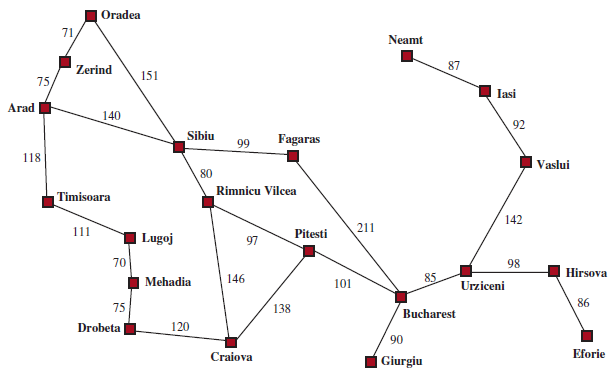

In [50]:
romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [51]:
h_rm = {'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234}

In [52]:
#call UCS for the above graph here..

path, cost = ucs('Arad', 'Bucharest', romanian_map)
print("\nUCS Path:", " -> ".join(path))
print("Total Cost:", cost)

Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind:75
Arad-Timisoara:118
Arad-Sibiu:140
Arad-Zerind is selected. Expanded list: Arad,Zerind
Arad-Zerind-Oradea:146
Arad-Timisoara is selected. Expanded list: Arad,Zerind,Timisoara
Arad-Timisoara-Lugoj:229
Arad-Sibiu is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu
Arad-Sibiu-Oradea:291
Arad-Sibiu-Fagaras:239
Arad-Sibiu-Rimnicu:220
Arad-Zerind-Oradea is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu
Arad-Sibiu-Rimnicu-Craiova:366
Arad-Sibiu-Rimnicu-Pitesti:317
Arad-Timisoara-Lugoj is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu,Lugoj
Arad-Timisoara-Lugoj-Mehadia:299
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu,Lugoj,Fagaras
Arad-Sibiu-Fagaras-Bucharest:450
Arad-Sibiu-Oradea is selected. Arad-Timisoara-Lugoj-Mehadia is selected. Expanded list: Arad,Zerind,Tim

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [53]:
# call GBFS for the above graph here

path_gbfs = gbfs('Arad', 'Bucharest', romanian_map, h_rm)

print("\nGBFS Path:", " -> ".join(path_gbfs))


Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind:75
Arad-Timisoara:118
Arad-Sibiu:140
Arad-Sibiu is selected. Expanded list: Arad,Sibiu
Arad-Sibiu-Oradea:291
Arad-Sibiu-Fagaras:239
Arad-Sibiu-Rimnicu:220
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Sibiu,Fagaras
Arad-Sibiu-Fagaras-Bucharest:450
Arad-Sibiu-Fagaras-Bucharest is selected. Bucharest is SELECTED and Goal test is satisfied.


TypeError: sequence item 0: expected str instance, list found

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [54]:
# call A* for the above graph here

path, cost = astar('Arad', 'Bucharest', romanian_map, h_rm)
print("\nA* Path:", " -> ".join(path))
print("Total Cost:", cost)

Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind: 449
Arad-Timisoara: 447
Arad-Sibiu: 393
Arad-Sibiu is selected. Expanded list: Arad, Sibiu
Arad-Sibiu-Oradea: 671
Arad-Sibiu-Fagaras: 415
Arad-Sibiu-Rimnicu: 413
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad, Sibiu, Rimnicu
Arad-Sibiu-Rimnicu-Craiova: 526
Arad-Sibiu-Rimnicu-Pitesti: 417
Arad-Sibiu-Fagaras is selected. Expanded list: Arad, Sibiu, Rimnicu, Fagaras
Arad-Sibiu-Fagaras-Bucharest: 450
Arad-Sibiu-Rimnicu-Pitesti is selected. Expanded list: Arad, Sibiu, Rimnicu, Fagaras, Pitesti
Arad-Sibiu-Rimnicu-Pitesti-Craiova: 615
Arad-Sibiu-Rimnicu-Pitesti-Bucharest: 418
Arad-Sibiu-Rimnicu-Pitesti-Bucharest is selected. Bucharest is SELECTED and Goal test is satisfied.

A* Path: Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest
Total Cost: 418


Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# New Exercise